In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('clarke-default')
from PressureDrop import Purifier
import h5py
import subprocess
import time
import os

### Calculate first for prototype flow conditions (in Stanford/SLAC systems)


Reynolds number for this flow: 24.2
Pressure drop over column: 0.0003 bar
Permeability of the Zr: 2.58e-09 m^2



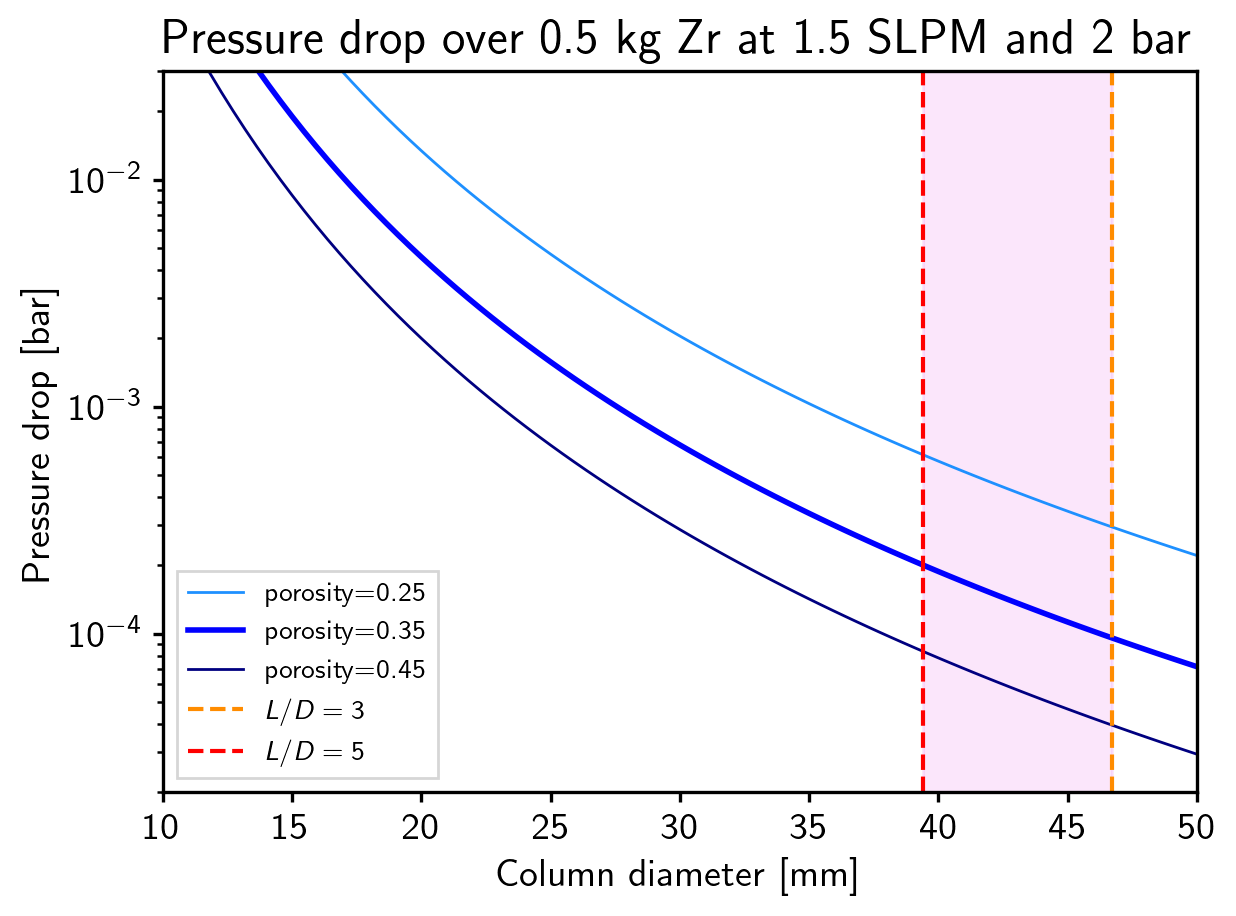

In [6]:
dpellet = 2e-3
hpellet = 2e-3
mdot = 1.5
mcolumn = 1.0
dtube = 1.375*0.0254
P_Xe = 2e5

# create purifier object
pur = Purifier(dtube=dtube,mcolumn=mcolumn,phi=0.64,P_Xe=P_Xe,mdot_slpm=mdot,\
               dpellet=dpellet,hpellet=hpellet) # for nEXO: 3 in diameter, 5 kg ST-707, 5 bar, 350 SLPM
print('\nReynolds number for this flow: {:.1f}'.format(pur.Re()))
print('Pressure drop over column: {:.4f} bar'.format(pur.Pdrop()))
print('Permeability of the Zr: {:.2e} m^2\n'.format(pur.perm()))

# loop through tube diameters and porosities
dtubes = np.linspace(0.005,0.05,100)
phis = np.array((0.75,0.65,0.55))
Pdrops_list = []
for i in range(len(phis)):
    Pdrops = []
    for j in range(len(dtubes)):
        this_pur = Purifier(dtubes[j],mcolumn,phis[i],P_Xe,mdot,\
                            dpellet=dpellet,hpellet=hpellet)
        Pdrops.append(this_pur.Pdrop())
        del this_pur
    Pdrops_list.append(Pdrops)

LD3 = 1e3*(4*pur.Vcolumn/3/np.pi)**(1./3)
LD5 = 1e3*(4*pur.Vcolumn/5/np.pi)**(1./3)

# save the data so it can be opened later and plotted for my thesis
with h5py.File('pressure_drop_prototype.h5', 'w') as d:
    short_hash = subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).decode('ascii').strip()
    git_origin = subprocess.check_output(['git', 'config', '--get', 'remote.origin.url']).decode('ascii').strip()
    
    d.attrs['git_revision_short_hash'] = short_hash
    d.attrs['git_origin'] = git_origin
    d.attrs['creation_timestamp'] = time.time()
    d.attrs['creation_user'] = str(os.environ.get('USER'))

    d.create_dataset('tube_diameters', data=dtubes)
    d.create_dataset('pressure_drop_porosity_0.25', data=Pdrops_list[0])
    d.create_dataset('pressure_drop_porosity_0.35', data=Pdrops_list[1])
    d.create_dataset('pressure_drop_porosity_0.45', data=Pdrops_list[2])
    d.create_dataset('L_over_D_range', data=np.array((LD5/1e3, LD3/1e3)))

fig,ax = plt.subplots()
ax.semilogy(dtubes*1e3,Pdrops_list[0],lw=1,color='dodgerblue',label='porosity={:.2f}'.format(1-phis[0]))
ax.semilogy(dtubes*1e3,Pdrops_list[1],lw=2,color='blue',label='porosity={:.2f}'.format(1-phis[1]))
ax.semilogy(dtubes*1e3,Pdrops_list[2],lw=1,color='navy',label='porosity={:.2f}'.format(1-phis[2]))
ax.set_title('Pressure drop over 0.5 kg Zr at 1.5 SLPM and 2 bar')
ax.set_ylabel('Pressure drop [bar]')
ax.set_xlabel('Column diameter [mm]')
ax.axvline(LD3,ls='--',color='darkorange',label='$L/D=3$')
ax.axvline(LD5,ls='--',color='red',label='$L/D=5$')
ax.fill_between([LD5,LD3],1e3,color='violet',alpha=0.2)
ax.set_xlim([10,50])
ax.set_ylim([2e-5,3e-2])
ax.legend(loc='best')

### Repeat for nEXO conditions


Reynolds number for this flow: 1230.0
Pressure drop over column: 0.1455 bar
Permeability of the Zr: 2.84e-10 m^2



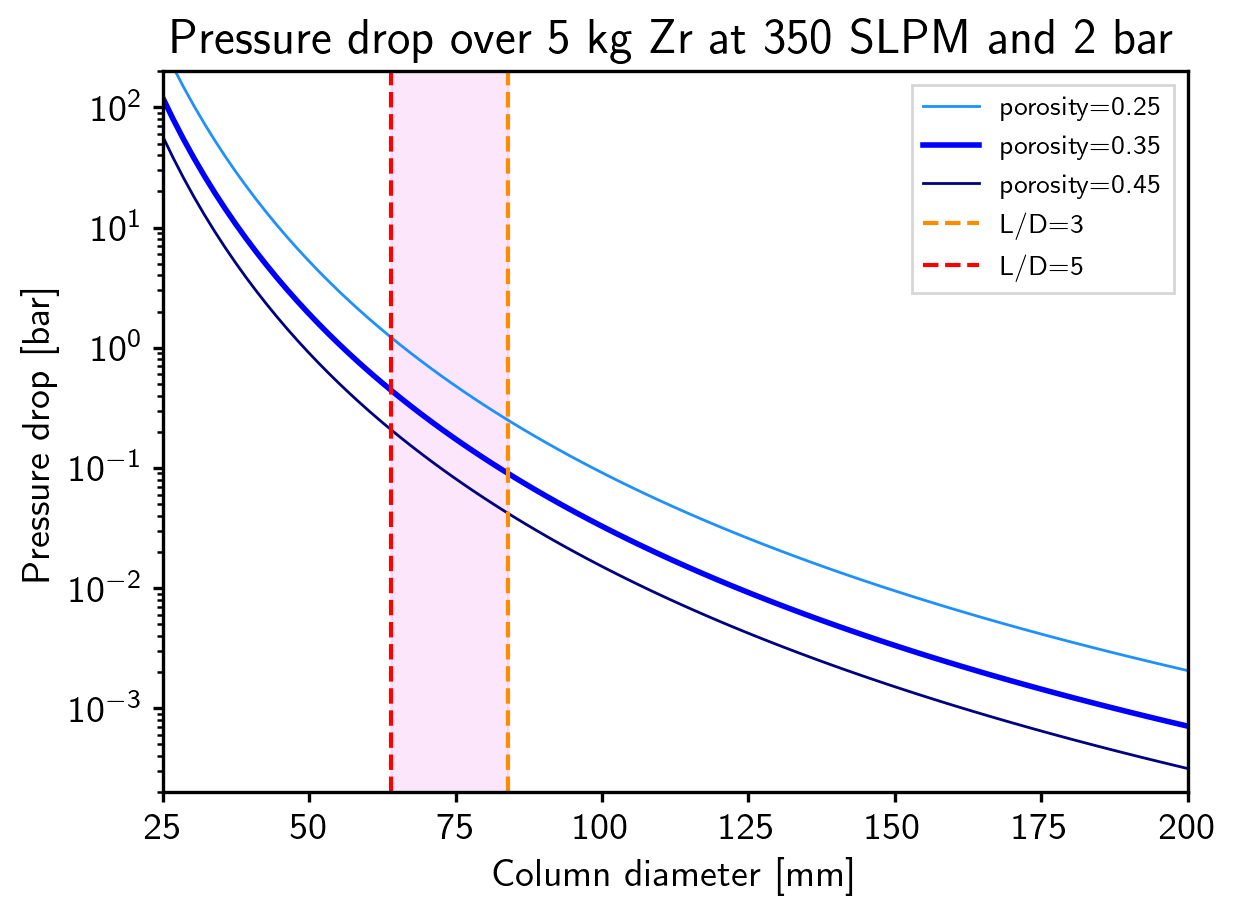

In [ ]:
dpellet = 2e-3
hpellet = 2e-3
mdot = 350.
mcolumn = 5.
dtube = 3.*0.0254
P_Xe = 2e5

# create purifier object
pur = Purifier(dtube=dtube,mcolumn=mcolumn,phi=0.64,P_Xe=P_Xe,mdot_slpm=mdot,\
               dpellet=dpellet,hpellet=hpellet) # for nEXO: 3 in diameter, 5 kg ST-707, 5 bar, 350 SLPM
print('\nReynolds number for this flow: {:.1f}'.format(pur.Re()))
print('Pressure drop over column: {:.4f} bar'.format(pur.Pdrop()))
print('Permeability of the Zr: {:.2e} m^2\n'.format(pur.perm()))

# loop through tube diameters and porosities
dtubes = np.linspace(0.025,0.2,100)
phis = np.array((0.75,0.65,0.55))
Pdrops_list = []
for i in range(len(phis)):
    Pdrops = []
    for j in range(len(dtubes)):
        this_pur = Purifier(dtubes[j],mcolumn,phis[i],P_Xe,mdot,\
                            dpellet=dpellet,hpellet=hpellet)
        Pdrops.append(this_pur.Pdrop())
        del this_pur
    Pdrops_list.append(Pdrops)

LD3 = 1e3*(4*pur.Vcolumn/3/np.pi)**(1./3)
LD5 = 1e3*(4*pur.Vcolumn/5/np.pi)**(1./3)

# save the data so it can be opened later and plotted for my thesis
with h5py.File('pressure_drop_nexo.h5', 'w') as d:
    short_hash = subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).decode('ascii').strip()
    git_origin = subprocess.check_output(['git', 'config', '--get', 'remote.origin.url']).decode('ascii').strip()
    
    d.attrs['git_revision_short_hash'] = short_hash
    d.attrs['git_origin'] = git_origin
    d.attrs['creation_timestamp'] = time.time()
    d.attrs['creation_user'] = str(os.environ.get('USER'))

    d.create_dataset('tube_diameters', data=dtubes)
    d.create_dataset('pressure_drop_porosity_0.25', data=Pdrops_list[0])
    d.create_dataset('pressure_drop_porosity_0.35', data=Pdrops_list[1])
    d.create_dataset('pressure_drop_porosity_0.45', data=Pdrops_list[2])
    d.create_dataset('L_over_D_range', data=np.array((LD5/1e3, LD3/1e3)))

fig,ax = plt.subplots()
ax.semilogy(dtubes*1e3,Pdrops_list[0],lw=1,color='dodgerblue',label='porosity={:.2f}'.format(1-phis[0]))
ax.semilogy(dtubes*1e3,Pdrops_list[1],lw=2,color='blue',label='porosity={:.2f}'.format(1-phis[1]))
ax.semilogy(dtubes*1e3,Pdrops_list[2],lw=1,color='navy',label='porosity={:.2f}'.format(1-phis[2]))
ax.set_title('Pressure drop over 5 kg Zr at 350 SLPM and 2 bar')
ax.set_ylabel('Pressure drop [bar]')
ax.set_xlabel('Column diameter [mm]')
ax.axvline(LD3,ls='--',color='darkorange',label='L/D=3')
ax.axvline(LD5,ls='--',color='red',label='L/D=5')
ax.fill_between([LD5,LD3],1e3,color='violet',alpha=0.2)
ax.set_xlim([25,200])
ax.set_ylim([2e-4,2e2])
ax.legend(loc='best')